# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

### Ознакомление с датафреймом.

Импортируем библиотеку `pandas` и читаем данные датафрейма.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

# создание переменной для промежуточного итога шага 2
artifact_data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Построение гисторамм для наглядности.
Строим гистограммы каждого столбца типа `int`.

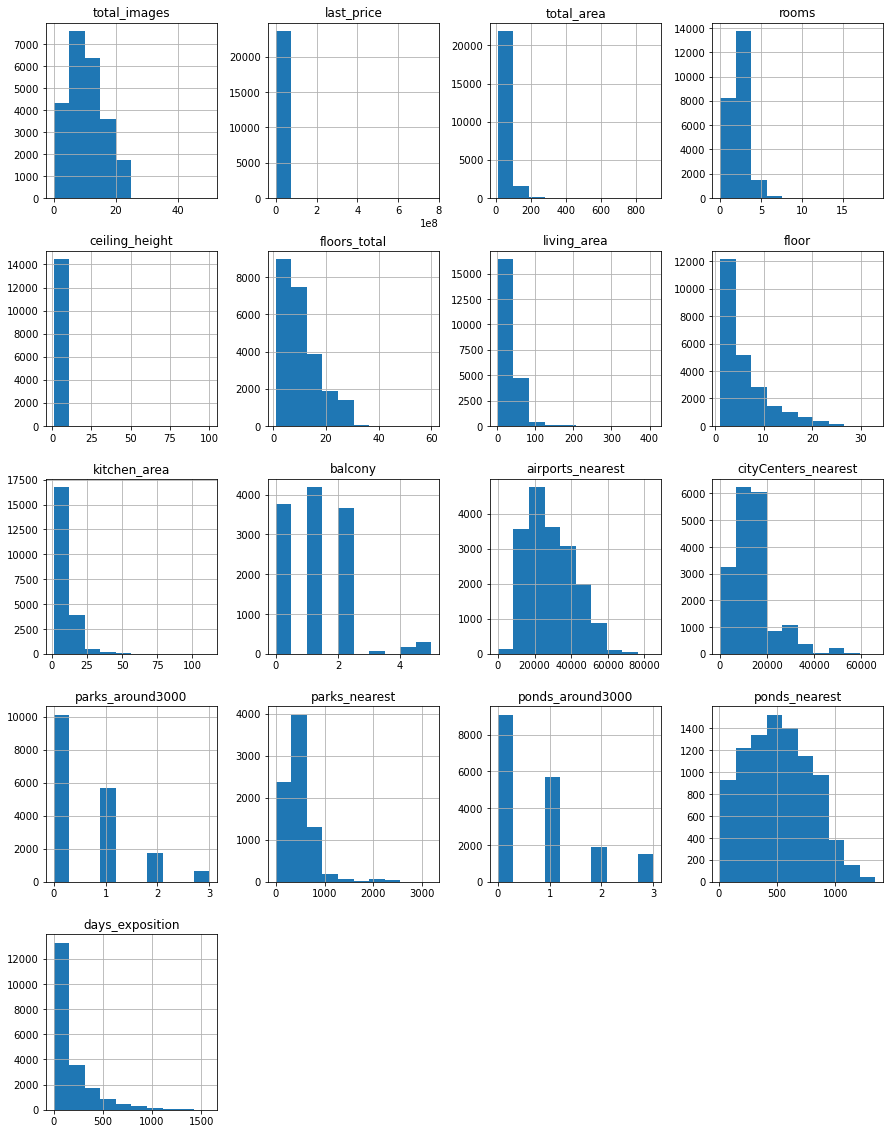

In [4]:
data.hist(figsize=(15, 20));

### Применение метода `describe()`.
Вывод на экран список характерных значений.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Предобработка данных.

### Вывод  пропущенных значений для каждого столбца и с дальнейшим заполнением пропусков в них.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [1]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

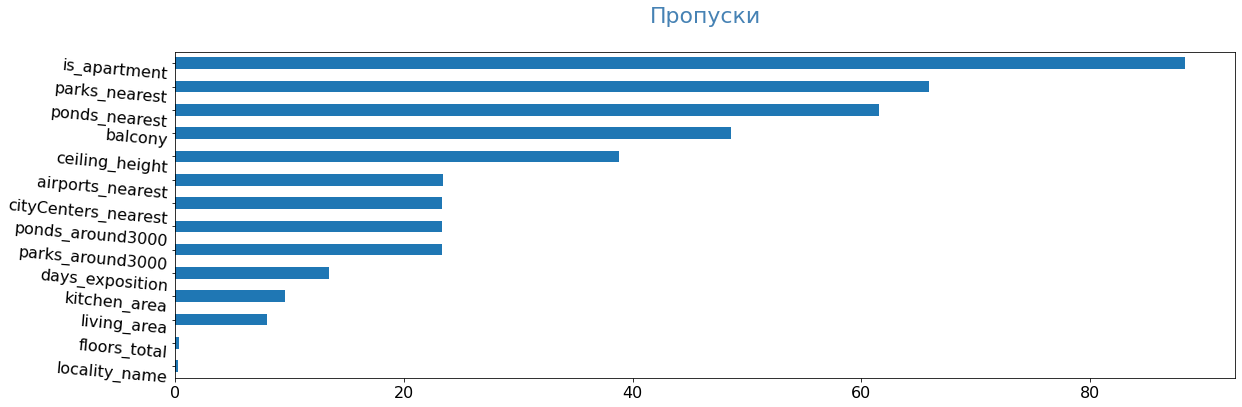

In [7]:
pass_value_barh(data)

Изменим название столбца `cityCenters_nearest` и приведём к общему виду.

In [8]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Пропущенные данные в высоте потолков заполняем медианным значением из записей с тем же типом.

In [9]:
# заполняем ceiling_height медианным значением среди всех записей с тем же типом
for i in data['floors_total'].unique(): 
    data.loc[(data['floors_total'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == i), 'ceiling_height'].median() 

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Избавляемся от пропусков в разных колонках датафрейма.

In [10]:
# заполнение всех пропусков в столбце "балконы" на "0", раз не указано, значит нет
data['balcony'] = data['balcony'].fillna(0)

# заполняем все пропуски 0, т.к. всё равно значения пропущены 
# а если 0 или Nan, то нам это не даёт никакой информации
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) 

# аналогично заполнению выше
data['parks_around3000'] = data['parks_around3000'].fillna(0) 

# удаляем строки, в которых в столбце locality_name встречается NaN 
#(их всего было 48 штук, поэтому сильно не повлияет на данные)
data = data.dropna(subset=['locality_name']) 

# удаляем 9 строк, где нет количества этажей в здании 
# (также небольшое количество строк не повлияет на анализ)
data = data.dropna(subset=['floors_total']) 

Заполняем пропуски для столбцов `kitchen_area, living_area`. Сначала вычисляем среднее отношение `жилой` и `кухонной` площадей к общей, затем в строках с пропусками умножаем общую площадь на этот коэффициент, получая необходимую площадь для заполнения пустот.

In [11]:
# создаём переменную с вычислением среднего отношения жилой площади к общей
ratio_living_area = (data['living_area'] / data['total_area']).mean()

# заполняем пустоты столбца 'living_area' умножением общей площади на коэффициент среднего отношения
data.loc[(data['living_area'].isna()), 'living_area'] = \
data.loc[(data['living_area'].isna()), 'total_area'] * ratio_living_area * 0.9

# создаём переменную с вычислением среднего отношения кухонной площади к общей
ratio_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()

# заполняем пустоты столбца 'kitchen_area' умножением общей площади на коэффициент среднего отношения
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = \
data.loc[(data['kitchen_area'].isna()), 'total_area'] * ratio_kitchen_area * 0.9

In [12]:
# сделаем колонку по сумме жилой и кухонной площадей
data['check_area_ratio'] = data['kitchen_area'] + data['living_area']

In [13]:
# сравниваем общую площадь и колонку с суммой жилой и кухонной
# если общая площадь больше и не равна суммарной площади жилая+кухонная, то присваиваем значение True 
data['compare_totalarea_ratio'] = np.where((data['total_area'] >= data['check_area_ratio']) & 
                                           data['total_area'] != data['check_area_ratio'], True, False)

In [14]:
# проверим значения True и False
data['compare_totalarea_ratio'].nunique()

1

In [15]:
# минимальные и максимальные показатели в колонках 
(
    data[['total_area', 'check_area_ratio']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,total_area,check_area_ratio
count,"23,565.00","23,565.00"
min,12.00,5.88
max,900.00,521.70


In [16]:
# check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


### Устранение неявных дубликатов в названиях населённых пунктов.
Приведём все типы населённых пунктов к единому именованию.

In [17]:
data = data.reset_index(drop=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('посёлок', 'поселок', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('городской', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('городского', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('типа', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('садовое товарищество', 'СНТ', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('имени', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('станции', '', regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('садоводческое некоммерческое товарищество', 'СНТ', 
                                                                  regex=True)
data.loc[:,'locality_name'] = data.loc[:,'locality_name'].replace('при железнодорожной', '', regex=True)



In [18]:
# check
data['locality_name'].nunique()

330

### Изменение типов данных.
- `first_day_exposition` - поменяем с *object* на *datetim64* т.к. это дата и время.
- `is_apartment` - поменяем с *object* на *bool* т.к. это описание, апартаменты - Да(True) / Нет(False).
- `floors_total` - меняем на целочисленное, не может же квартира находиться на этаже 14.3 к примеру.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

# заполняем пропущенные значения 0 (False), т.к. при смене типа все значения станут True
# а так мы всё равно имеем 20 000 с небольшим пропусков в этой колонке
# и что Nan, что False, любом случае нет достоверной информации об этом параметре
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')

data['floors_total'] = data['floors_total'].astype('int')

### Избавление от аномальных значений.

- `ceiling_height` - в столбце имеются значения, которые введены с ошибкой, применим замену медианой значений, что выбиваются за рамки *4.5* и *2.2* метров. Значение медианы выглядит объективным. Если пробовать значения делать, то опять же получим выбросы и придётся от них по-новому избавляться, некая рекурсия.
- `last_price` - сортируем колонку с ценой с лимитом в 65 млн. и отсекаем значения, которые могут немного повлиять на данные (квартиры со стоимостью от 65млн до 700млн)
- В столбце `rooms` есть аномалии с количеством комнат от 8 до 19 штук, но этих строк совсем немного и их можно оставить

В остальных столбцах аномалий не замечено.

In [21]:
# Было
"""
# сортируем колонку по высоте потолков от 2.2 до 4.5 метров (выше уже аномалии или выбросы, например, 20, 30 метров)
#data = data[(data['ceiling_height'] >= 2.2) & (data['ceiling_height'] <= 4.5)] 
"""
# Стало

# сортируем данные по высоте потолков от 2.2 до 4.5 метров 
data.loc[data['ceiling_height'] > 4.5, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] < 2.2, 'ceiling_height'] = data['ceiling_height'].median()


# сортируем колонку по цене с лимитов в 65 млн. 
# тем самым отрезая всего 80 квартир , убирая тем самым аномальные цены
data = data[(data['last_price'] <= 65000000)] 

Проверяем ещё раз количество оставшихся пропущенных значений для каждого столбца.

In [22]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 1
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest            5520
city_centers_nearest        5499
parks_around3000               0
parks_nearest              15514
ponds_around3000               0
ponds_nearest              14517
days_exposition             3155
check_area_ratio               0
compare_totalarea_ratio        0
dtype: int64

In [23]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,479.00","23,479.00","23,478.00","20,324.00","23,479.00","23,479.00","23,479.00","23,479.00","23,479.00"
min,0.00,12.00,2.20,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,590.00,4.50,"1,580.00","65,000,000.00",409.00,100.70,33.00,60.00


In [24]:
# check
data.rooms.value_counts().to_frame().sort_index()

,rooms
0,193
1,8004
2,7894
3,5760
4,1151
5,304
6,95
7,52
8,9
9,7


Избавимся от квартир с комнатами больше 7 (таких всего 31 штук) - сильно не повлияет на выборку. Квартиры где комнат указано "0" - допускаем, что это студии, и судя по общему метражу эта гипотеза имеет место.

In [25]:
data = data[(data['rooms'] <= 7)]

In [26]:
data.rooms.value_counts().sort_index()

0     193
1    8004
2    7894
3    5760
4    1151
5     304
6      95
7      52
Name: rooms, dtype: int64

Также откинем объявления с этажностью здания выше 35 этажей (таких всего 6 штук). Согласен с тем, что это немного необычное объявления для нашего датасета.

In [27]:
data = data[(data['floors_total'] <= 35)]

In [28]:
data.floors_total.value_counts().sort_index()

1       25
2      379
3      665
4     1178
5     5747
6      893
7      573
8      374
9     3747
10    1172
11     202
12    1360
13     228
14     553
15     365
16    1374
17     833
18     505
19     339
20     270
21     158
22     286
23     349
24     462
25    1074
26     124
27     164
28      21
29       1
33       1
34       1
35      24
Name: floors_total, dtype: int64

### Промежуточный вывод.
В результате предобработки датафрейма получилось следующее:

In [29]:
print(f'Исходное количество строк в датафрейме: {len(artifact_data)}')
print(f'Количество строк после предобработки данных: {len(data)}')
print(f'Количество удаленных записей: {len(artifact_data) - len(data)}')

Исходное количество строк в датафрейме: 23699
Количество строк после предобработки данных: 23447
Количество удаленных записей: 252


Количество удалённых записей составило менее `1.5%` - это хороший результат предобработки данных.

## Посчитайте и добавьте в таблицу новые столбцы.

### Для анализа в дальнейшем нам понадобятся новые столбцы с новыми данными.
 - цена одного квадратного метра

In [30]:
data['square_meter_price'] = data['last_price'].div(data['total_area'].values)
data['square_meter_price'] = data['square_meter_price'].astype('int')

 - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [31]:
data['weekday'] = data['first_day_exposition'].dt.weekday

 - месяц публикации объявления

In [32]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

 - год публикации объявления

In [33]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

 - тип этажа квартиры (значения — «первый», «последний», «другой»)

Создаём функцию `apartment_floor_type` для нового столбца с типами квартир в зависимости от этажности.

In [34]:
def apartment_floor_type(floor, floors_total):   
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(lambda x: apartment_floor_type(x.floor, x.floors_total), axis=1)
#data.head(15)

Выше через собственную функцию, ниже без функции, через библиотеку numpy.

P.S. вроде как писали, что надо делать через собственную функцию, поэтому на выходе 2 варианта))

In [35]:
"""
# создаём список условий
conditions = [
    (data['floor'] == 1),
    (data['floor'] == data['floors_total']),
    (data['floor'] != 1) & (data['floor'] != data['floors_total'])]

# создаём список значений
values = ['первый', 'последний', 'другой']

# добавляем столбец с
data['floor_type'] = np.select(conditions, values)
"""

"\n# создаём список условий\nconditions = [\n    (data['floor'] == 1),\n    (data['floor'] == data['floors_total']),\n    (data['floor'] != 1) & (data['floor'] != data['floors_total'])]\n\n# создаём список значений\nvalues = ['первый', 'последний', 'другой']\n\n# добавляем столбец с\ndata['floor_type'] = np.select(conditions, values)\n"

 - расстояние в км до центра города и округлим значение

In [36]:
data['km_to_city_center'] = data['city_centers_nearest'] / 1000
data['km_to_city_center'] = data['km_to_city_center'].round()

In [37]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,check_area_ratio,compare_totalarea_ratio,square_meter_price,weekday,month,year,floor_type,km_to_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,...,755.0,NaN,76.000000,True,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.60000,1,False,...,NaN,81.0,29.600000,True,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.30000,4,False,...,574.0,558.0,42.600000,True,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,80.84251,9,False,...,234.0,424.0,107.650806,True,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,...,48.0,121.0,73.000000,True,100000,1,6,2018,другой,8.0


## Проведите исследовательский анализ данных

 ### Задание 1.
 **Изучим следующие параметры объектов на гистограммах:**

 - общая площадь;

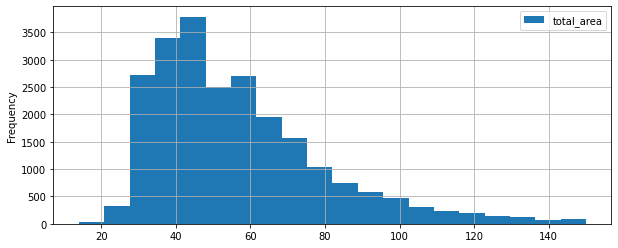

In [38]:
data.plot(y=['total_area'], bins=20, kind='hist', range=(14, 150), figsize=(10,4), grid=True);

Сделаем диапазон квартир от `14` - минимальный метраж в объявлениях и до `150` - оптимальный метраж для наглядности (выше этого метража меньше 1% квартир). По гистограмме видно, что наибольшее количество объявлений приходится на квартиры с метражами от `30 метров` до `61 метра`. Далее идёт спад по количеству предложений с большим метражом.

---

  - жилая площадь;

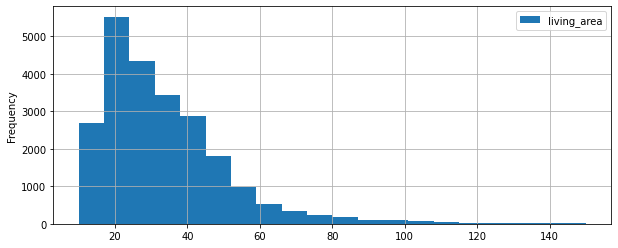

In [39]:
data.plot(y=['living_area'], bins=20, kind='hist', range=(10, 150), figsize=(10,4), grid=True);

Сделаем диапазон жилой площади от `10` - оптимальный метраж для наглядности и до `150` - лучший метраж для наглядности (выше этого метража меньше 1% квартир). По гистограмме видно, что наибольшее количество объявлений приходится на квартиры с метражами жилой площади от `10` до `45 ` метров. Далее идёт очень сильный спад по количеству предложений с большим метражом.

---

  - площадь кухни;

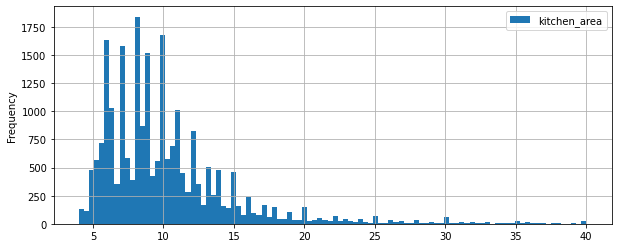

In [40]:
data.plot(y=['kitchen_area'], bins=100, kind='hist', range=(4, 40), figsize=(10,4), grid=True);

Сделаем диапазон жилой площади от `4` - оптимальный метраж для наглядности и до `40` - лучший метраж для наглядности (выше этого метража меньше 1% квартир). По гистограмме видно, что наибольшее количество объявлений приходится на квартиры с метражами кухонь от `5` до `15 ` метров. Квартиры с кухней больше `25` метров становится всё сложнее находить.

---

  - цена объекта;

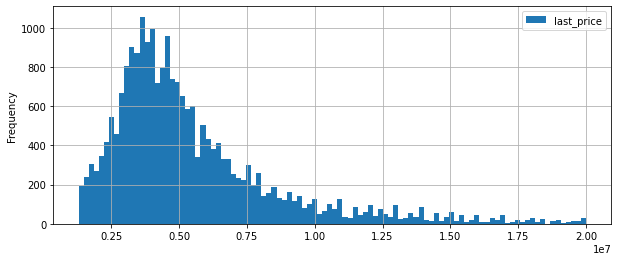

In [41]:
data.plot(y=['last_price'], bins=100, kind='hist', range=(1300000, 20000000), figsize=(10,4), grid=True);

Сделаем диапазон цен от `1.300.000` - оптимальная начальная цена для наглядности и до `20.000.000` - наилучшая цена для наглядности (выше этой цены меньше 1% квартир). По гистограмме видно, что населения чаще всего покупает квартиры по ценам от `2.000.000` до `7.500.000 `. Квартиры со стоимостью выше `7.500.000` реже приобретают, но покупательская способность имеется.

---

  - количество комнат;

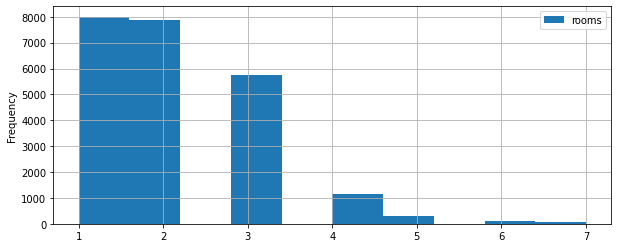

In [42]:
data.plot(y=['rooms'], bins=10, kind='hist', range=(1, 7), figsize=(10,4), grid=True);

Сделаем диапазон комнат от `1` - как видно из объявлений это одна из самых больших категорий и до `7` - оптимальный вариант для наглядности (выше этого значения квартир меньше 1%). По гистограмме видно, что наибольшее количество объявлений приходится на квартиры с количеством комнат `1,2,3`. Квартиры с большим количеством комнат менее привлекательны, скорее всего из-за цены.

---

  - высота потолков;

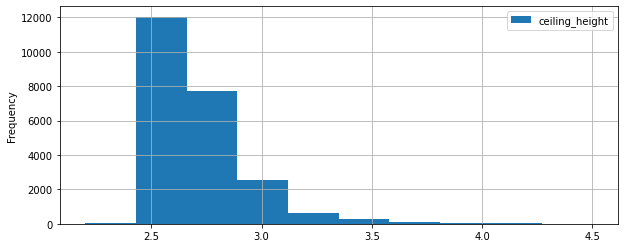

In [43]:
data.plot(y=['ceiling_height'], bins=10, kind='hist', range=(2.20, 4.50), figsize=(10,4), grid=True);

Сделаем диапазон потолков от `2.20` - как мы и отсортировали в таблице и до `4.50`. По гистограмме видно, что наибольшее количество объявлений приходится на квартиры с высотой потолков от `2` до `3.3` метров. 

---

  - этаж квартиры;

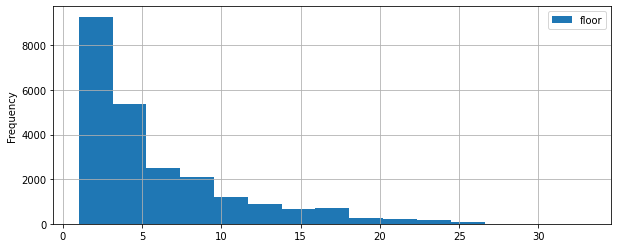

In [44]:
data.plot(y=['floor'], bins=15, kind='hist', range=(1, 33), figsize=(10,4), grid=True);

Сделаем диапазон квартир по этажам от `1` до `33` - захватим весь столбец из датафрейма. По гистограмме видно, что в основном покупают квартиры на этажах `1-10`.

---

  - тип этажа квартиры («первый», «последний», «другой»);

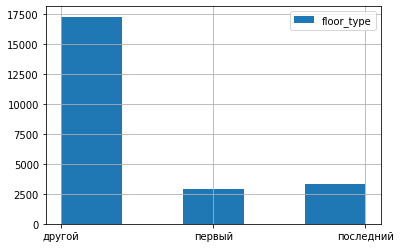

In [45]:
data['floor_type'].hist(bins=5, legend=True);

Из гистограммы делаем вывод, что основное количество объявлений о квартирах, которые располагаются не на первом и последнем этажах.

---

  - общее количество этажей в доме;

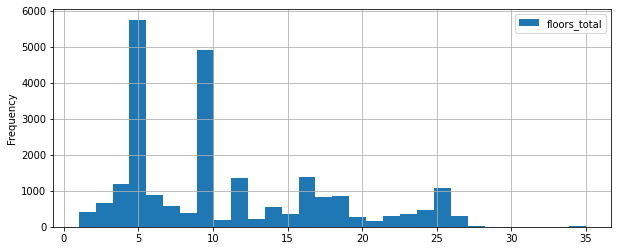

In [46]:
data.plot(y=['floors_total'], bins=30, kind='hist', range=(1,35), figsize=(10,4), grid=True);

Диапазон выставим по количеству этажей в домах с `1` по `35`. Количество `5ти` и `10ти` этажек превалирует над остальными домами.

---

  - расстояние до центра города в метрах;

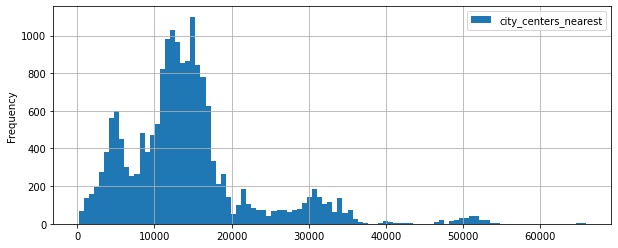

In [47]:
data.plot(y=['city_centers_nearest'], bins=100, kind='hist', figsize=(10,4), grid=True);

Гистограмма показывает, что квартиры с удалённостью от `3000` метров и до `17000` метров пользуются наивысшим спросом.

---

  - расстояние до ближайшего аэропорта;

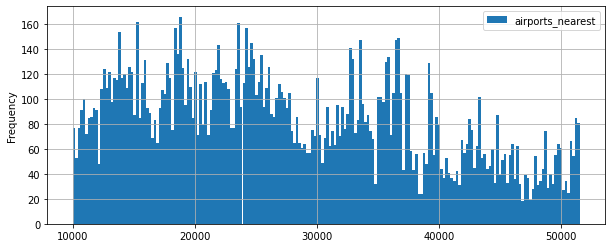

In [48]:
data.plot(y=['airports_nearest'], bins=200, kind='hist', range=(10000,51550), figsize=(10,4), grid=True);

Ограничим диапазон данных с `10000` и до `51550` метров. Исходя из гистограммы, видно, чем дальше находится квартира тем реже на неё спрос, но всё равно находятся любители тишины.

---

  - расстояние до ближайшего парка;

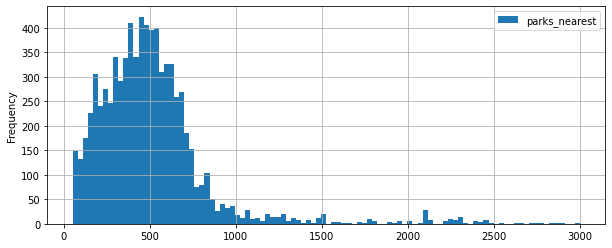

In [49]:
data.plot(y=['parks_nearest'], bins=100, kind='hist', range=(50,3000), figsize=(10,4), grid=True);

По данным на гистограмме можно сказать, что количество квартир находящееся на расстоянии от `50` до `800` метров занимает основную часть в датафрейме. Но данная модель не является эталонной, т.к. наличие пропусков в колонке составляет более 15000 шт.

In [50]:
data['parks_nearest'].isna().sum()

15506

---

  - день и месяц публикации объявления.

Гистограмма для дня публикации объявления.

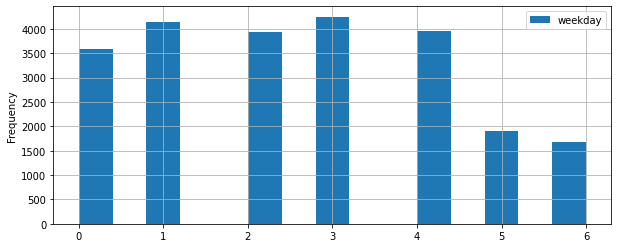

In [51]:
data.plot(y=['weekday'], bins=15, kind='hist', range=(0,6), figsize=(10,4), grid=True);

Публикация объявлений происходит в основном в будние дни и равномерно распределено, в то время, как, публикация в выходные дни куда реже.

Гистограмма для месяца публикации объявления.

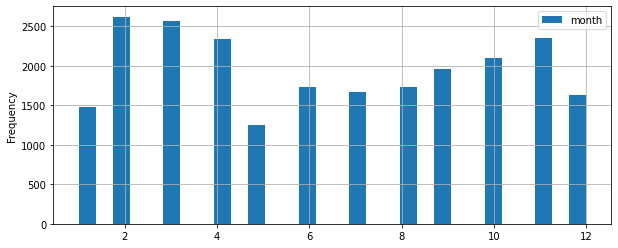

In [52]:
data.plot(y=['month'], bins=30, kind='hist', figsize=(10,4), grid=True);

Гистограмма публикаций по месяцам показывает, что пик приходится на начало года. К лету и до зимы количество объявлений распределяется равномерно.

---

### Задание 2. 
**Изучите, как быстро продавались квартиры столбец `days_exposition`. Этот параметр показывает, сколько дней «висело» каждое объявление.**

Медианное значение дней объявления о продаже квартиры: 95.0
Среднее арифметическое значение дней объявления о продаже квартиры: 180.0249765998325


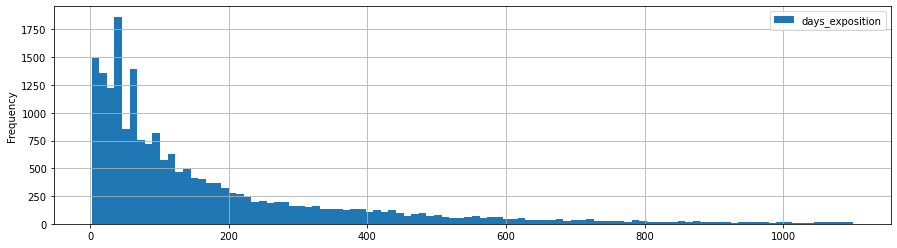

In [53]:
data.plot(y=['days_exposition'], bins=100, kind='hist', range=(2, 1100), figsize=(15,4), grid=True)
print(f'Медианное значение дней объявления о продаже квартиры: {data["days_exposition"].median()}')
print(f'Среднее арифметическое значение дней объявления о продаже квартиры: {data["days_exposition"].mean()}')

Исходя из гистограммы видно, что пик продаж квартир приходится на 95 день объявления (как раз чёткое медианное значение), а вот ближе к средне арифметическому происходит спад продаж. Все квартиры, проданные раньше пикового значения можно считать быстрыми. Чем дольше висит объявление , тем хуже продаётся квартира и можно сказать, что необычно долгими продажами являются квартиры, со сроком более 800 дней - почти 24 месяца.


---

### Задание 3. 
**Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.**

In [54]:
# создаём переменную с данными, которые нам необходимо отобразить на графике
last_price_multi = (
    data
    .pivot_table(
        index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday', 'month', 'year'], 
        aggfunc='median')
)

#pd.plotting.scatter_matrix(last_price_multi, figsize=(15, 15));

Коэффициент Пирсона 0.77 - имеется линейна зависимость.


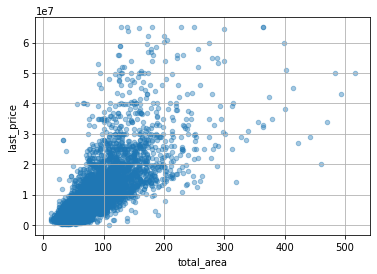

In [55]:
# Посчитаем коэффициент Пирсона
print(f'Коэффициент Пирсона {data["last_price"].corr(data["total_area"]).round(decimals=2)} - имеется линейна зависимость.')

data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.4, grid=True);

Общая площадь опрделённо влияет на общую стоимость квартиры. Основная часть квартир с метражом до *200 метров* расположилась в пределах цены до *3 000 000 руб.*

Коэффициент Пирсона 0.69 - имеется небольшая линейна зависимость.


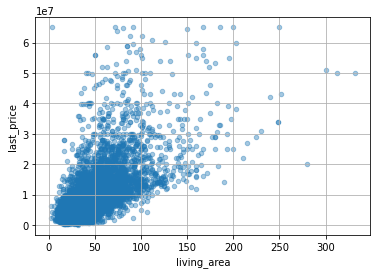

In [56]:
# Посчитаем коэффициент Пирсона
print(f'Коэффициент Пирсона {data["last_price"].corr(data["living_area"]).round(decimals=2)} - имеется небольшая линейна зависимость.')

data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.4, grid=True);

Метраж жилой площади как и кухонной больше влияет на общий метраж. Также пик приходится на диапазон до *110 метров* с диапазоном в цене до *3 000 000 руб.*

Коэффициент Пирсона 0.62 - имеется небольшая линейна зависимость.


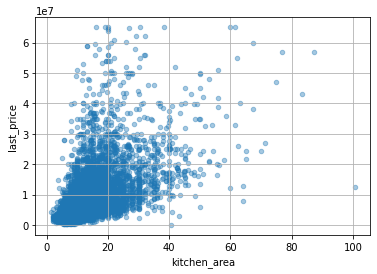

In [57]:
# Посчитаем коэффициент Пирсона
print(f'Коэффициент Пирсона {data["last_price"].corr(data["kitchen_area"]).round(decimals=2)} - имеется небольшая линейна зависимость.')

data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.4, grid=True);

Кухонная зона обычно меньше жилой площади, но всё равно имеет такое же влияние на общую цену. На графике видно, что пик цен в *3 000 000 руб.* приходится на диапазон до *30 метров*.

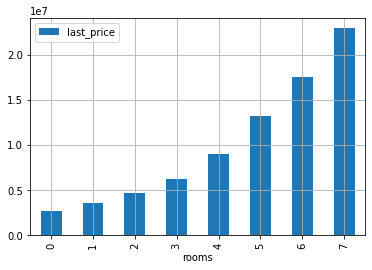

In [75]:
rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_pivot.plot(grid=True, kind='bar');

Вот самый основной фактор, который влияет на общую полную стоимость объекта. В него входит вся площадь (общая, живая, кухонная, сан. узлы, балконы и другие различные помещения). Количество комнат имеет наибольший эффект на цену.

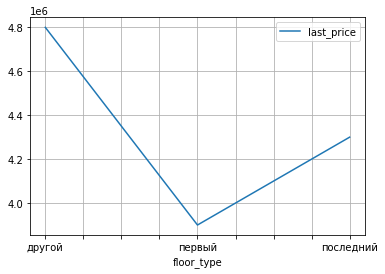

In [59]:
floor_type_pivot = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_type_pivot.plot(grid=True);

Из графика видно, что наибольший диапазон цен приходится на квартиры, которые располагаются не на первом и последнем этажа, следовательно имеется тоже существенное влияние на итоговую цену.

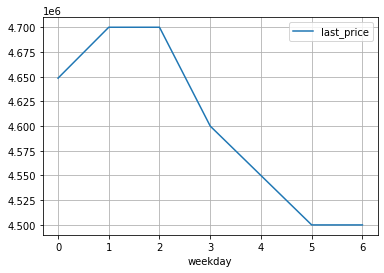

In [60]:
data_pivot_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc='median')
data_pivot_weekday.plot(grid=True);

Вторник и средя - являются днями, когда выкладываются объявления с самой высокой стоимость. В воскресенье самая низкая.

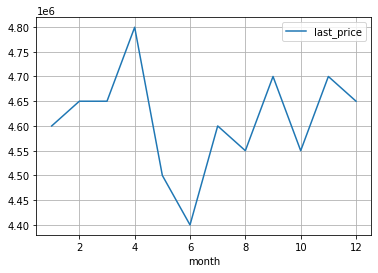

In [61]:
data_pivot_month = data.pivot_table(index='month', values='last_price', aggfunc='median')
data_pivot_month.plot(grid=True);

Апрель также показывает, что самый дорого месяц в плане объявдений о продаже квартир, а вот в июне виднеется сильный спад по стоимости.

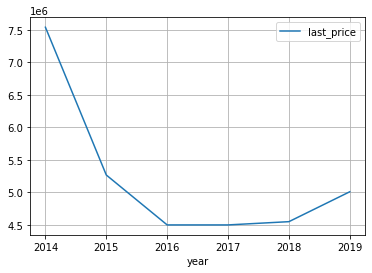

In [62]:
data_pivot_year = data.pivot_table(index='year', values='last_price', aggfunc='median')
data_pivot_year.plot(grid=True);

2014 год - был пик дорогих квартир, дальше пошло снижение. Дешёвые квартиры выкладывались с 2016 по 2017 года.

На общую полную стоимость объекта влияет непосредственно такой параметр как комнаты - пик приходится на `3х комнатные квартиры`, дальше за комнатами уже идёт зависимость по общему размеру квартиры. От общей площади зависят кухонная и жилая площади. Что касается дат размещения, то в 2017 год был самым насыщенным по продажам квартир в большом циновом диапазоне.

---

### Задание 4. 
**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.**

,кол-во объявлений,цена квадратного метра
locality_name,,
Санкт-Петербург,15535,112840.06
Пушкин,369,103125.37
деревня Кудрово,299,92473.09
поселок Парголово,327,90175.49
поселок Мурино,552,85629.11
поселок Шушары,439,78550.88
Колпино,337,75332.87
Гатчина,307,68745.69
Всеволожск,398,68654.01


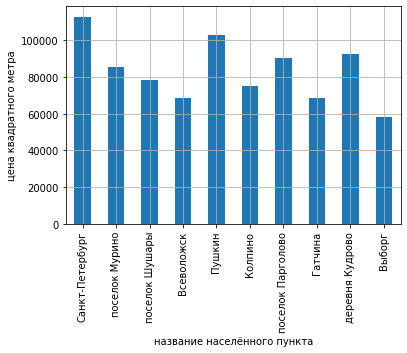

In [81]:
# создаём собственную функцию для решения задачи
def create_pivot_table(column):
    pivot_top_10 = data.pivot_table(index=[column], values='square_meter_price', aggfunc=['count', 'mean'])
    pivot_top_10.columns = ['кол-во объявлений', 'цена квадратного метра']
    pivot_top_10 = pivot_top_10.sort_values('кол-во объявлений', ascending=False).head(10)
    return pivot_top_10

pivot = create_pivot_table(data['locality_name'])
display(pivot.sort_values('цена квадратного метра', ascending=False).round(decimals=2))

bar = pivot['цена квадратного метра'].plot(kind='bar', ylabel='цена квадратного метра',
                                           xlabel='название населённого пункта', grid=True)

По таблице видно, что на 1-ом месте находится `Санкт_Петербург` , на втором `Пушкин` - хоть и маленький, но цена квадратного метра почти как у города-миллионера.

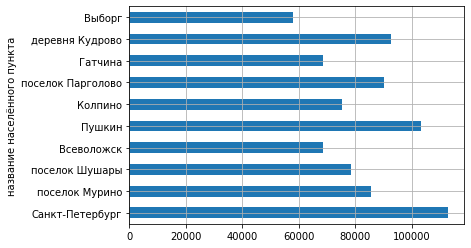

In [64]:
# check

bar = pivot[['цена квадратного метра'
            ]].plot(kind='barh', ylabel='цена квадратного метра', 
                    xlabel='название населённого пункта', grid=True, legend = False)

---

### Задание 5. 
**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [65]:
# фильтруем все данные по городу Санкт-Петербург и избавляется от пустых значений
data_spb = data[(data['locality_name'] == 'Санкт-Петербург') & (~data['km_to_city_center'].isna())]

# строим пивот
mean_km_price = data_spb.pivot_table(index=['km_to_city_center'], values='square_meter_price', aggfunc='mean')


# меняем название столбцов
mean_km_price.columns = ['цена квадратного метра']
mean_km_price.round(decimals=2)

,цена квадратного метра
km_to_city_center,
0.0,223445.68
1.0,146780.73
2.0,142199.73
3.0,119019.13
4.0,128244.07
5.0,136509.23
6.0,142920.74
7.0,147905.06
8.0,125072.60


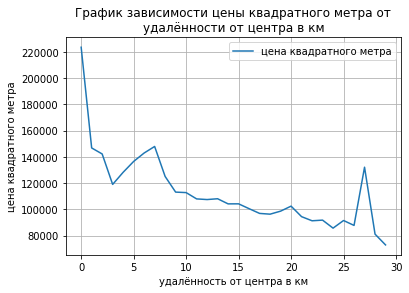

In [66]:
ax = mean_km_price.plot(grid=True);
ax.set_xlabel("удалённость от центра в км");
ax.set_ylabel("цена квадратного метра");
title = ax.set_title("\n".join(wrap("График зависимости цены квадратного метра от удалённости от центра в км", 50)))

Из графика делаем вывод - чем дальше от центра находится квартира, тем дешевле стоимость квадратного метра.
Есть пару аномальных всплесков

## Общий вывод

Была проделана плодотворная работа:
- заполнение пропусков в столбцах, где это было возможно;
- устранение неявных дубликатов в названиях населённых пунктов;
- изменение типов данных, чтоб в дальнейшем можно было работать со столбцами;
- избавление от аномальных значений;
- добавление новых столбцов с данными для решения задач.

Решены 5 задач:

`1. Изучены параметры объектов на гистограммах.`

Найдены и описаны разные зависимости типов данных и их влияние.

`2. Изучена скорость продажи квартир.`

Общая масса квартир продаётся в интервале до 95 дней, совпадает с медианным значением и считаются быстрыми продажами. Среднее арифмитическое в 180 дней уже попадает в категорию обычные продажи. Все объявления, что превышают длительнсоть свыше среднего значения продаются намного дольше, а необычно долгими продажами являются квартиры со сроком более 800 дней.

`3. Изучен фактор влияния на общую (полную) стоимость объекта.`

Хочется сказать, что тут очевидный фактор цены - это общий метраж квартиры, но на самом деле общий метраж напрямую зависит от количества комнат, а дни и недели не имеют особого влияния. Какая разница когда покупать квартиру по хорошей цене.

`4. Выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра.`

На удивление, на втором месте оказался город Пушкин, который не является рекордсменом по количеству объявлений о продаже, однако, стоимость квадратного метра там почти ничем не уступает лидеру городу Санкт-Петербургу с ценой за 1*кв*м в 112771.58 рубль.

`5. Расчитали средню цену каждого километра для города Санкт-Петербург.`

Подтвердился логичный вывод - чем дальше от центра, тем дешевле стоимость квадратного метра.

На последок, основываясь на данных, хочется сказать, что если квартира не продалась за 95 дней, то стоит подумать, что в объявлении не так и не ждать момента, когда дни продаж перейдут за критический уровень в 169 дней. Ведь если продаётся квартира - значит есть цель выручить за неё деньги. Лучше скинуть немного цену и уступить своим принципам, нежели сидеть с объявлением по несколько лет и надеяться, что однажды ты увидишь своего покупателя и по итогу уступишь ему в цене, потому что нет сил уже ждать.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод